# 6. Support Vector Machines

- 작성자: [JWarmenhoven's Exercise 6](https://nbviewer.jupyter.org/github/JWarmenhoven/Coursera-Machine-Learning/blob/master/notebooks/Programming%20Exercise%206%20-%20Support%20Vector%20Machines.ipynb)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from scipy.io import loadmat
from sklearn.svm import SVC

%matplotlib inline
import seaborn as sns
sns.set_context("notebook")
sns.set_style("white")

nested plotting

In [9]:
def plotData(X, y):
  pos = (y == 1).ravel()
  neg = (y == 0).ravel()
  plt.figure(figsize = (8, 6))
  plt.scatter(X[pos, 0], X[pos, 1], s = 60, marker = '+', linewidths = 1)
  plt.scatter(X[neg, 0], X[neg, 1], s = 60, marker = 'o', linewidths = 1)

In [17]:
def plot_svc(svc, X, y, h = 0.02, pad = 0.25):
  Xmin, Xmax = X[:, 0].min() - pad, X[:, 0].max() + pad
  Ymin, Ymax = X[:, 1].min() - pad, X[:, 1].max() + pad
  xx, yy = np.meshgrid(np.arange(Xmin, Xmax, h), np.arange(Ymin, Ymax, h))
  Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  
  sv = svc.support_vectors_
  
  plotData(X, y)
  plt.scatter(sv[:, 0], sv[:, 1], c = 'k', marker = '|', s = 100, linewidths = 1)
  plt.contourf(xx, yy, Z, cmap = plt.cm.Paired, alpha = 0.2)

  plt.xlim(Xmin, Xmax)
  plt.ylim(Ymin, Ymax)
  plt.xlabel("X1")
  plt.ylabel("X2")
  plt.show()
  print("Number of support vectors:", svc.support_.size)

### Support Vector Machines

#### (Linear) Support Vector Classifier
- first example

In [6]:
data1 = loadmat("/content/drive/My Drive/study/ML(Andrew Ng)/data/ex6data1.mat")
data1.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [7]:
y1 = data1['y']
X1 = data1['X']
print(f"X1: {X1.shape}, y1: {y1.shape}")

X1: (51, 2), y1: (51, 1)


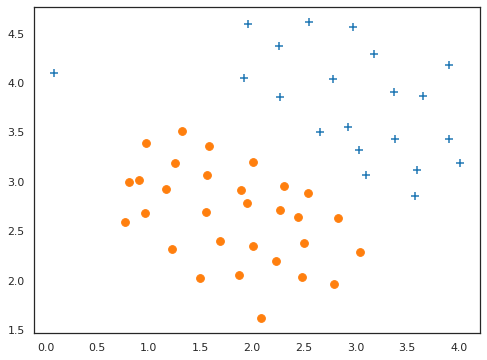

In [10]:
plotData(X1, y1)

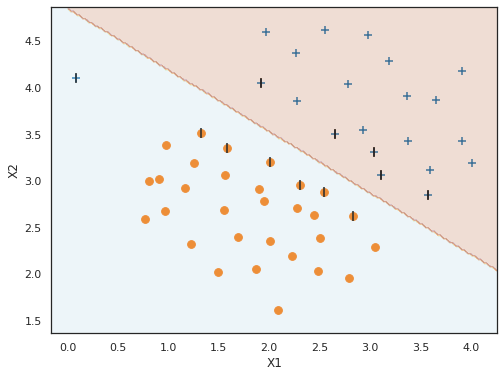

Number of support vectors: 12


In [18]:
clf = SVC(kernel = "linear")
clf.fit(X1, y1.ravel())
plot_svc(clf, X1, y1)

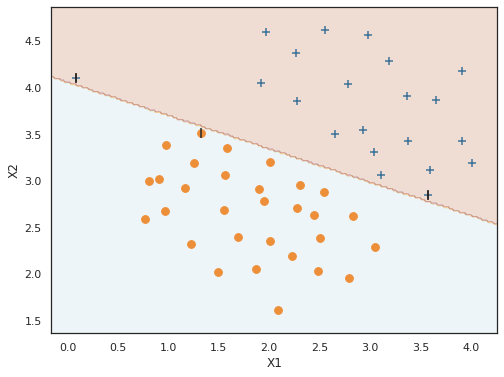

Number of support vectors: 3


In [20]:
clf.set_params(C = 100)
clf.fit(X1, y1.ravel())
plot_svc(clf, X1, y1)

C가 그 정확한 명칭은 기억이 나지 않는데, 다른 class에 대한 민감도에 대한 척도 중 하나였던 듯하다.<br />그래서 C = 1.0일 때는 좀 더 느슨하게(?) 잡아서 Support Vector(이하 SV)가 많은 것(일정 큰 수 개의 SV가 나올 때까지 한 것)이고, C = 100으로 바뀌면서 민감도가 크게 올라 SV가 적을 때 끝난 것이다.

#### SVM with Gaussian Kernels

In [23]:
def gaussianKernel(x1, x2, sigma = 2):
  norm = (x1 - x2).T.dot(x1 - x2)
  return(np.exp(-norm / (2 * sigma**2)))

In [24]:
x1 = np.array([1, 2, 1])
x2 = np.array([0, 4, -1])
sigma = 2
gaussianKernel(x1, x2, sigma)

0.32465246735834974

second example

In [26]:
data2 = loadmat("/content/drive/My Drive/study/ML(Andrew Ng)/data/ex6data2.mat")
data2.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [27]:
y2 = data2['y']
X2 = data2['X']
print(f"X2: {X2.shape}, y2: {y2.shape}")

X2: (863, 2), y2: (863, 1)


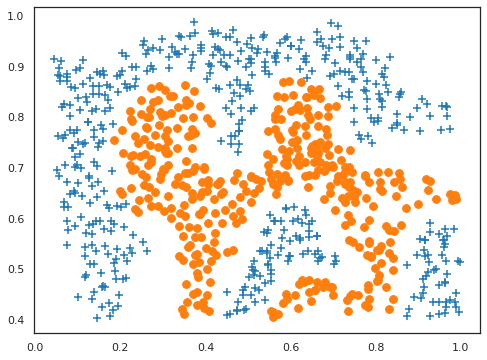

In [28]:
plotData(X2, y2)

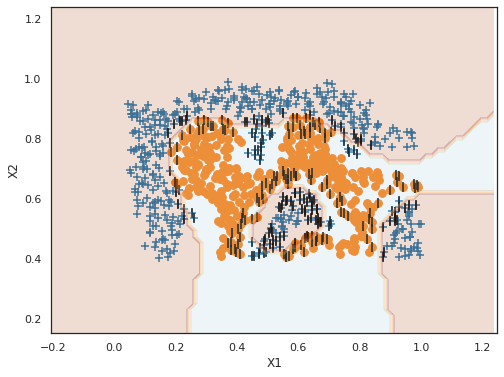

Number of support vectors: 254


In [29]:
clf2 = SVC(C = 50, gamma = 6)
clf2.fit(X2, y2.ravel())
plot_svc(clf2, X2, y2)

#### addition) Polynomial Classifier

In [30]:
data3 = loadmat("/content/drive/My Drive/study/ML(Andrew Ng)/data/ex6data3.mat")
data3.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y', 'yval', 'Xval'])

In [32]:
y3 = data3['y']
X3 = data3['X']
print(f"X3: {X3.shape}, y3: {y3.shape}")

X3: (211, 2), y3: (211, 1)


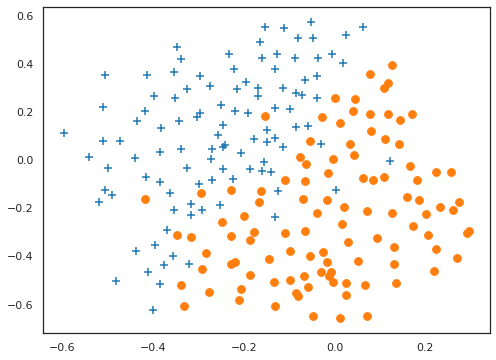

In [33]:
plotData(X3, y3)

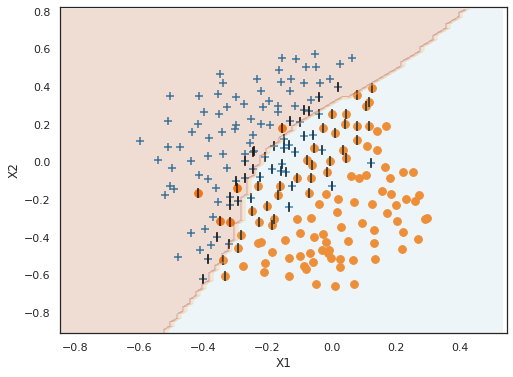

Number of support vectors: 78


In [34]:
clf3 = SVC(kernel = "poly", gamma = 10)
clf3.fit(X3, y3.ravel())
plot_svc(clf3, X3, y3)

#### addition) Spam classification

In [36]:
data4 = pd.read_table("https://nbviewer.jupyter.org/github/JWarmenhoven/Coursera-Machine-Learning/blob/master/notebooks/data/vocab.txt", header = None)
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1899 entries, 0 to 1898
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1899 non-null   int64 
 1   1       1898 non-null   object
dtypes: int64(1), object(1)
memory usage: 29.8+ KB


object로 들어있어서 read_csv로 읽어와지지 않는다..

In [39]:
data4.head()

,0,1
0,1,aa
1,2,ab
2,3,abil
3,4,abl
4,5,about


In [49]:
data4[data4[1] == "aa"]

,0,1
0,1,aa


문득 이 데이터엔 뭐가 spam인지 정해져 있지 않다는 걸 알고는 그만뒀음..